In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
sess = tf.InteractiveSession()

<class 'numpy.ndarray'> (534, 949, 3) uint8


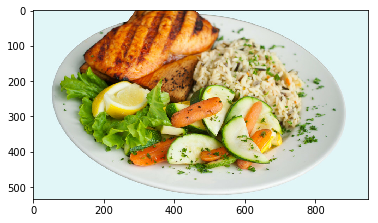

In [27]:
#read and show original image
img_path = '201703-orig-healthy-plate-949x534.jpg'
img_raw = tf.read_file(img_path)
img_tensor = tf.image.decode_image(img_raw).eval()
print(type(img_tensor),img_tensor.shape, img_tensor.dtype)

plt.imshow(img_tensor)
plt.grid(False)

<class 'numpy.ndarray'> (428, 761, 3) uint8


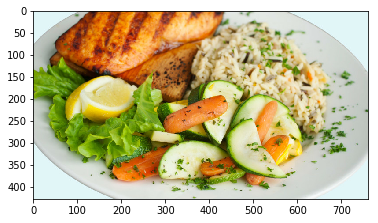

In [28]:
#central crop image
img_crop = tf.image.central_crop(img_tensor, .8).eval()
print(type(img_crop),img_crop.shape, img_crop.dtype)

plt.imshow(img_crop)
plt.grid(False)

<class 'numpy.ndarray'> (427, 759, 3) float32


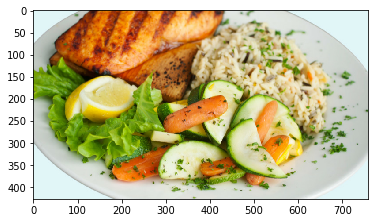

In [37]:
#arbitrary crop image
img_tensor_4d = tf.expand_dims(img_tensor, 0) #4-D tensor of shape [batch, image_height, image_width, depth]
boxes = [[.1, .1, .9, .9]] #specified in normalized coordinates [y1, x1, y2, x2]
box_ind = [0]
crop_size = [int(img_tensor.shape[0]*(boxes[0][2]-boxes[0][0])), int(img_tensor.shape[1]*(boxes[0][3]-boxes[0][1]))]

img_crop = tf.image.crop_and_resize(
              image = img_tensor_4d,
              boxes = boxes,
              box_ind = box_ind,
              crop_size = crop_size
          ).eval()

img_crop = tf.squeeze(img_crop, [0]).eval()
print(type(img_crop),img_crop.shape, img_crop.dtype)

plt.imshow(img_crop.astype(np.uint8))
plt.grid(False)

In [0]:
sess.close()